In [468]:
import networkx as nx

In [469]:
import numpy as np

In [470]:
def draw(g):
    nx.draw(g, nx.kamada_kawai_layout(g))

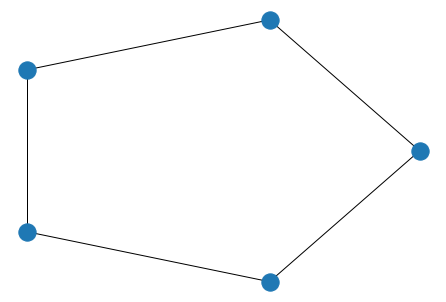

In [471]:
pentagon = nx.Graph()
pentagon.add_edges_from([(0,1),(1,2),(2,3),(3,4),(4,0)])
ppos = nx.kamada_kawai_layout(pentagon)
nx.draw(pentagon, ppos)

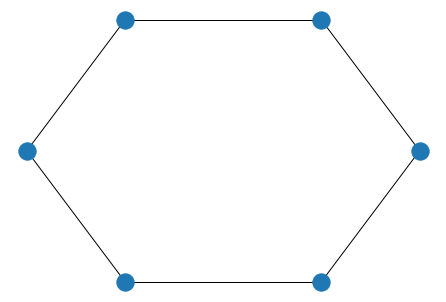

In [135]:
hexagon = nx.Graph()
hexagon.add_edges_from([(0,1),(1,2),(2,3),(3,4),(4,5),(5,0)])
hpos = nx.kamada_kawai_layout(hexagon)
nx.draw(hexagon, hpos)

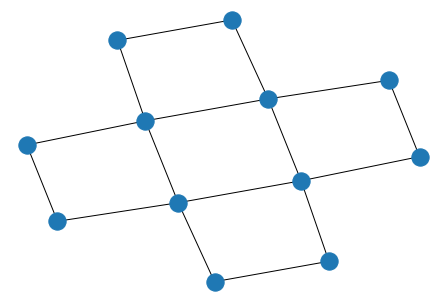

In [153]:
cross = nx.Graph()
cross.add_edges_from([(0,1),(1,2),(2,3),(3,4),(4,5),(5,6),(6,7),(7,8),(8,9),(9,10),(10,11),(11,0),\
                      (2,5),(5,8),(8,11),(11,2)])
hpos = nx.kamada_kawai_layout(cross)
nx.draw(cross, hpos)

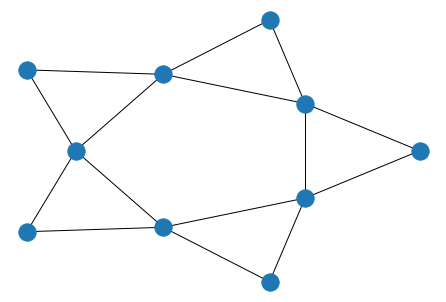

In [137]:
star = nx.Graph()
star.add_edges_from([(0,1),(1,2),(2,3),(3,4),(4,5),(5,6),(6,7),(7,8),(8,9),(9,0),\
                     (1,3),(3,5),(5,7),(7,9),(1,9)])
hpos = nx.kamada_kawai_layout(star)
nx.draw(star, hpos)

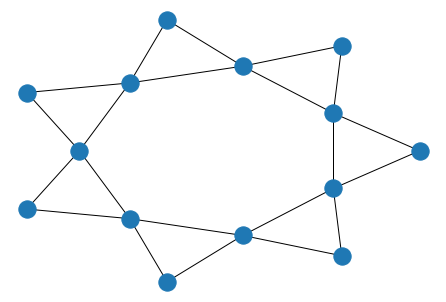

In [264]:
star2 = nx.Graph()
star2.add_edges_from([(0,1),(1,2),(2,3),(3,4),(4,5),(5,6),(6,7),(7,8),(8,9),(9,10),(10,11),(11,12),(12,13),(13,0),
                     (1,3),(3,5),(5,7),(7,9),(9,11),(11,13),(13,1)])
hpos = nx.kamada_kawai_layout(star2)
nx.draw(star2, hpos)

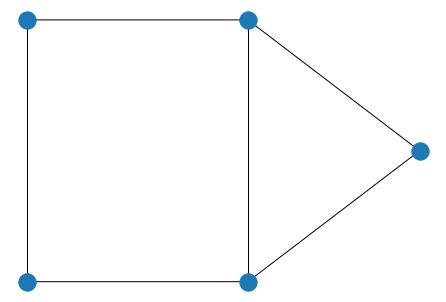

In [385]:
house = nx.Graph()
house.add_edges_from([(0,1),(1,2),(2,3),(3,4),(4,0),(1,4)])
ppos = nx.kamada_kawai_layout(house)
nx.draw(house, ppos)

In [386]:
shapes = [pentagon, hexagon, house, cross, star, star2]

In [298]:
import dgl
import torch
import pickle as pkl
import numpy as np

In [440]:
def generate_fake_graph(ig, fx_num_nodes, edge_per_node=3, max_edges=-1):
    g = ig.copy()
    offset = g.number_of_nodes()
    rem_nodes = fx_num_nodes - offset
    ng = nx.barabasi_albert_graph(rem_nodes, edge_per_node)
    if max_edges > 0:
        # cutting some edges
        max_edges -= g.number_of_edges()
        num_trim_edges = ng.number_of_edges() - max_edges
        if num_trim_edges <= 0:
            print("max_edges must be larger than ig.number_of_edges()",\
                  g.number_of_edges())
        else:
            edges = ng.edges()
            cut_edges = np.random.choice(len(edges), size=num_trim_edges, replace=False)
            cut_edges = set(cut_edges)
            for i, (s, d) in enumerate(edges):
                if not i in cut_edges:
                    continue
                ng.remove_edge(s, d)
    for s, d in ng.edges():
        g.add_edge(s + offset, d + offset)
    connect_edges = np.random.randint(1, offset)
    g.add_edge(0, fx_num_nodes-1)
    return g

In [438]:
def convert_to_dgl(gx, dim):
    g = dgl.from_networkx(gx)
    g.ndata['attr'] = torch.ones((g.num_nodes(), dim))/dim
    return g

In [444]:
fk = generate_fake_graph(pentagon, 25, 1, -1)

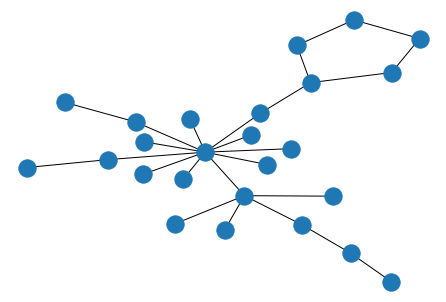

In [454]:
draw(fk)

In [477]:
fx_num_nodes = 25
max_edges = -1
edge_per_nodes = 1
num_graphs = 500

In [447]:
outputs = [generate_fake_graph(g, fx_num_nodes, edge_per_nodes, max_edges) for g in shapes[:3] for _ in range(num_graphs)]    
output_dgl = [convert_to_dgl(g, 10) for g in outputs]

In [448]:
labels1 = torch.ones(num_graphs)
labels = [labels1 * i for i in range(3)]
labels = torch.hstack(labels).to(torch.long)

In [449]:
with open('./datasets/BA-3motifs.pkl', 'wb') as f:
    pkl.dump((output_dgl, labels), f)

In [466]:
edges = [g.num_edges() for g in output_dgl]

In [465]:
nodes = [g.num_nodes() for g in output_dgl]

In [467]:
np.mean(nodes), np.mean(edges)

(25.0, 50.666666666666664)

In [472]:
with open('./datasets/BA-3motifs.pkl', 'rb') as f:
    graphs = pkl.load(f)

In [479]:
nx = generate_fake_graph(pentagon, fx_num_nodes, edge_per_nodes, max_edges)

In [480]:
dgl.from_networkx(nx)

Graph(num_nodes=25, num_edges=50,
      ndata_schemes={}
      edata_schemes={})

In [481]:
nx.number_of_edges()

25